# Predicting House Sale Prices with Linear Regression

In this project we are going to build a linear regression model that predicts the price of houses.

The data set is [housing data for the city of Ames, Iowa, US from 2006 to 2010](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627).

The dataset can be downloaded [here](https://www.kaggle.com/hamzajabbarkhan/ames-housingtsv/tasks).


In [192]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [49]:
data = pd.read_csv('AmesHousing.txt', delimiter='\t')

In [50]:
pd.options.display.max_columns = 99
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Set up a pipeline of functions that will enable us to iterate on different models:

- transform_features()
- select_features()
- train_and_test()

Make a basic pipeline with only one feature (Ground Living Area) 

In [160]:
def transform_features(df):
    return df.copy()

In [161]:
def select_features(df):
    return df[['Gr Liv Area','SalePrice']].copy()

In [164]:
def train_and_test(df):
   
    
    train = df[:1460].copy()
    test = df[1460:].copy()
    
      
       
    numerical_train = train.select_dtypes(include=['integer', 'float'])
    numerical_test = test.select_dtypes(include=['integer', 'float'])
    
    features = numerical_train.columns.drop('SalePrice')
    target = 'SalePrice'
   
       
    lrm = LinearRegression()
    lrm.fit(numerical_train[features], numerical_train[target])
        
   
    predictions = lrm.predict(numerical_test[features])
    
    rmse = np.sqrt(mean_squared_error(numerical_test[target], predictions))
    return rmse

In [165]:
transformed = transform_features(data)
selected = select_features(transformed)
rmse = train_and_test(selected)
print(rmse)

57088.25161263909


## Transforming Features

### Missing Values

Start by exploring by deleting the features with certain number of missing values.

To start, a threshold of 25% of missing values in a column is set:

In [94]:
def transform_features(df):
    copy_df = df.copy()
    df_null_counts = copy_df.isnull().sum()
    df_filter_missing_values = copy_df.drop(df_null_counts[(df_null_counts>len(df)*0.25)].index, axis = 1)
    transformed_df = df_filter_missing_values
    return transformed_df


### Data leakage
Year sold is not information that is known if we want to make a prediction, therefore it should be removed

In [80]:
def transform_features(df):
    copy_df = df.copy()
    df_null_counts = copy_df.isnull().sum()
    df_filter_missing_values = copy_df.drop(df_null_counts[(df_null_counts>len(df)*0.25)].index, axis = 1)
    
    df_leak = df_filter_missing_values.drop(['Yr Sold'])
    
    transformed_df = df_leak
    
    return transformed_df


### Combining Features

Combine features that do not have any meaning by their own. For instance Year Build and Year of Renovation.

Computing the difference between the two we can make a feature that measures the years until renovation after the construction.

In [83]:
def transform_features(df):
    copy_df = df.copy()
    
    df_null_counts = copy_df.isnull().sum()
    df_filter_missing_values = copy_df.drop(df_null_counts[(df_null_counts>len(df)*0.25)].index, axis = 1)
    
    df_leak = df_filter_missing_values.drop(['Yr Sold'], axis = 1)
    
    df_combine = df_leak    
    df_combine['years_until_remod'] = df_combine['Year Remod/Add'] - df_combine['Year Built']    
    df_combine = df_combine.drop(['Year Remod/Add','Year Built'], axis = 1)
    
    transformed_df = df_combine
    
    return transformed_df

### Categorical to Numerical

There are some categorical variables that may give some valueable information about the target and can be coded into numerical with Dummy Coding.

For instance:

Land Contour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
       
Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       
House Style: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
       
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [91]:
def transform_features(df):
    copy_df = df.copy()
    
    df_null_counts = copy_df.isnull().sum()
    df_filter_missing_values = copy_df.drop(df_null_counts[(df_null_counts>len(df)*0.25)].index, axis = 1)
    
    df_leak = df_filter_missing_values.drop(['Yr Sold'], axis = 1)
    
    df_combine = df_leak    
    df_combine['years_until_remod'] = df_combine['Year Remod/Add'] - df_combine['Year Built']    
    df_combine = df_combine.drop(['Year Remod/Add','Year Built'], axis = 1)
    
    
    
    categorical_cols = ['Land Contour','Utilities','Street','House Style', 'Neighborhood']
    df_categorical = df_combine
    for col in categorical_cols:
        col_dummies = pd.get_dummies(df_categorical[col])
        df_categorical = pd.concat([df_categorical, col_dummies], axis=1)
        del df_categorical[col]
    
    
    transformed_df = df_categorical
    
    return transformed_df

### Removing Non-Numerical and non-usable Numerical features for regression

For instance PID column is a numerical column but it does not give any useful information for a linear regression model.

Many others are categorical object type that may not worth making into numerical.


In [103]:
def transform_features(df):
    copy_df = df.copy()
    
    df_null_counts = copy_df.isnull().sum()
    df_filter_missing_values = copy_df.drop(df_null_counts[(df_null_counts>len(df)*0.25)].index, axis = 1)
    
    df_leak = df_filter_missing_values.drop(['Yr Sold'], axis = 1)
    
    df_combine = df_leak    
    df_combine['years_until_remod'] = df_combine['Year Remod/Add'] - df_combine['Year Built']    
    df_combine = df_combine.drop(['Year Remod/Add','Year Built'], axis = 1)
    
    
    
    categorical_cols = ['Land Contour','Utilities','Street','House Style', 'Neighborhood']
    df_categorical = df_combine
    for col in categorical_cols:
        col_dummies = pd.get_dummies(df_categorical[col])
        df_categorical = pd.concat([df_categorical, col_dummies], axis=1)
        del df_categorical[col]
    
    df_numerical_select = df_categorical.select_dtypes(include=['integer', 'float'])
    df_numerical_select = df_numerical_select.drop(['PID','Garage Yr Blt','Order','Mo Sold','Bsmt Full Bath','Bsmt Half Bath'], axis = 1)
    
    
    transformed_df = df_numerical_select
    
    return transformed_df

### Imputing missing values

Filling missing values with the most common value of the feature after removing missing values betond the 25% threshold

In [187]:
def transform_features(df):
    copy_df = df.copy()
    
    df_null_counts = copy_df.isnull().sum()
    df_filter_missing_values = copy_df.drop(df_null_counts[(df_null_counts>len(df)*0.25)].index, axis = 1)
    
    df_leak = df_filter_missing_values.drop(['Yr Sold'], axis = 1)
    
    # impute with most common value of the remaining columns
    df_impute = df_leak
    for col in df_impute.columns:
        df_impute[col]= df_impute[col].fillna(df_impute[col].value_counts().index.tolist()[0])
    
    # combine numeric columns
    df_combine = df_impute    
    df_combine['years_until_remod'] = df_combine['Year Remod/Add'] - df_combine['Year Built']    
    df_combine = df_combine.drop(['Year Remod/Add','Year Built'], axis = 1)
    
    
    # transform categorical columns
    categorical_cols = ['Land Contour','Utilities','Street','House Style', 'Neighborhood']
    df_categorical = df_combine
    for col in categorical_cols:
        col_dummies = pd.get_dummies(df_categorical[col])
        df_categorical = pd.concat([df_categorical, col_dummies], axis=1)
        del df_categorical[col]
    
    df_numerical_select = df_categorical.select_dtypes(include=['integer', 'float'])
    df_numerical_select = df_numerical_select.drop(['PID','Garage Yr Blt','Order','Mo Sold','Bsmt Full Bath','Bsmt Half Bath'], axis = 1)
    
   
    
    transformed_df = df_numerical_select
    
    return transformed_df

0

## Selecting Features

The main idea it to use as many features as possible as long as they give meaningful information about the target.

Collinearity between features can be used as a method to discard some of them.


### Correlation of Features

Display the correlation of numeric columns after transforming the same way the function transform_features() does, but without the Dummy transformation of categorical columns.

For this purpose a dedicated function is provided: transform_features_correlation()

In [146]:
def transform_features_correlation(df):
    copy_df = df.copy()
    
    df_null_counts = copy_df.isnull().sum()
    df_filter_missing_values = copy_df.drop(df_null_counts[(df_null_counts>len(df)*0.25)].index, axis = 1)
    
    df_leak = df_filter_missing_values.drop(['Yr Sold'], axis = 1)
    
    # impute with most common value of the remaining columns
    df_impute = df_leak
    for col in df_impute.columns:
        df_impute[col]= df_impute[col].fillna(df_impute[col].value_counts().index.tolist()[0])
    
    # combine numeric columns
    df_combine = df_impute    
    df_combine['years_until_remod'] = df_combine['Year Remod/Add'] - df_combine['Year Built']    
    df_combine = df_combine.drop(['Year Remod/Add','Year Built'], axis = 1)
        
    df_numerical_select = df_combine.select_dtypes(include=['integer', 'float'])
    df_numerical_select = df_numerical_select.drop(['PID','Garage Yr Blt','Order','Mo Sold','Bsmt Full Bath','Bsmt Half Bath'], axis = 1)
     
    
    transformed_df = df_numerical_select
    
    return transformed_df

With the sorted correlation of features with the traget it is possible to have an idea of the most useful variables:

In [147]:
correlation_set = transform_features_correlation(data)
corrmat = correlation_set.corr()
sorted_corrs = corrmat['SalePrice'].abs().sort_values()
print(sorted_corrs)

BsmtFin SF 2         0.006018
Misc Val             0.015691
3Ssn Porch           0.032225
Low Qual Fin SF      0.037660
Pool Area            0.068403
MS SubClass          0.085092
Overall Cond         0.101697
Screen Porch         0.112151
Kitchen AbvGr        0.119814
Enclosed Porch       0.128787
Bedroom AbvGr        0.143913
Bsmt Unf SF          0.183308
years_until_remod    0.240168
Lot Area             0.266549
2nd Flr SF           0.269373
Half Bath            0.285056
Open Porch SF        0.312951
Wood Deck SF         0.327143
Lot Frontage         0.333292
BsmtFin SF 1         0.433147
Fireplaces           0.474558
TotRms AbvGrd        0.495474
Mas Vnr Area         0.502196
Full Bath            0.545604
1st Flr SF           0.621676
Total Bsmt SF        0.632529
Garage Area          0.640138
Garage Cars          0.647812
Gr Liv Area          0.706780
Overall Qual         0.799262
SalePrice            1.000000
Name: SalePrice, dtype: float64


It is more visual to plot a heatmap of the correlations among features.

A threshold of 0.2 correlation to target is set in order to simplify the heatmap.

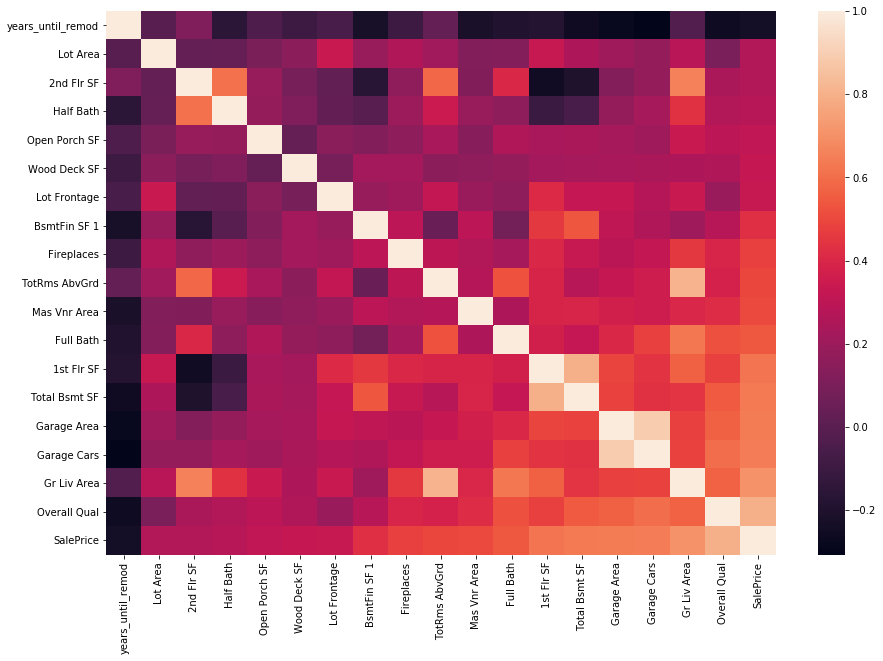

In [149]:
strong_corrs = sorted_corrs[sorted_corrs > 0.2]

corrmat = correlation_set[strong_corrs.index].corr()

fig = plt.figure(figsize=(15,10))
sns.heatmap(corrmat)


Features such as Garage Area and Garage Cars have a very high correlation. Since Garage Area is continuous it gives more nuance and should be the one to keep.

The same happens with TotRms AbvGrd and Gr Liv Area, being the latter more useful since it has higher correlation to target SalePrice.

Total Bsmt SF is highly correlated to 1st Flr SF but might not be advisable to remove since not every house has basement.

In [174]:
def select_features(df):    
    select_df = df.drop(['Garage Cars', 'TotRms AbvGrd'], axis = 1).copy()
    return select_df

## Training and Testing

Here the final train_and_test() function is implemented.

It shall be able to use holdout validation (k=0), simple cross validation (K=1) and k-fold cross validation (k > 1)

In [197]:
def train_and_test(df, k = 0):
    
    features = df.columns.drop('SalePrice')
    target = 'SalePrice'  
    
    if k < 0:
        return 0
   
    if k==0:
        train = df[:1460]
        test = df[1460:]          
         
        lrm = LinearRegression()
        lrm.fit(train[features], train[target])
   
        predictions = lrm.predict(test[features])
    
        rmse = np.sqrt(mean_squared_error(test[target], predictions))
        return rmse
    
    elif k==1:
        shuffled_index = np.random.permutation(df.index)
        df = df.reindex(shuffled_index)
        
        fold_one =  df[:1460]
        fold_two = df[1460:]
        
        lrm = LinearRegression()
        lrm.fit(fold_one[features], fold_one[target])
   
        predictions_one = lrm.predict(fold_two[features])
    
        rmse_one = np.sqrt(mean_squared_error(fold_two[target], predictions_one))
        
        lrm.fit(fold_two[features], fold_two[target])
   
        predictions_one = lrm.predict(fold_one[features])
    
        rmse_two = np.sqrt(mean_squared_error(fold_one[target], predictions_one))
        
        return (rmse_one + rmse_two)/2
    
    elif k>1:
        kf = KFold(n_splits = k, shuffle = True , random_state = 1)

        lrm = LinearRegression()

        mses = cross_val_score(lrm,df[features], df[target], scoring = 'neg_mean_squared_error', cv = kf )

        return np.sqrt(abs(mses))
    
        
        
    

In [201]:
transformed = transform_features(data)
selected = select_features(transformed)
rmse = train_and_test(selected, 5)
print(rmse)

[27142.55706514 35412.29133664 36825.44385549 26098.567827
 31923.28261272]


[]

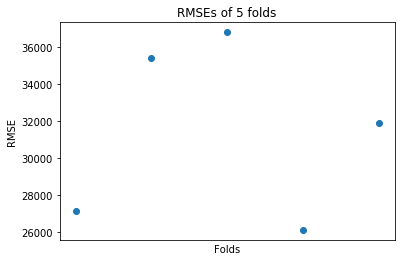

In [202]:
fig,ax = plt.subplots(1)
plt.scatter(range(len(rmse)),rmse)
plt.title('RMSEs of {} folds'.format(len(rmse)))
plt.xlabel('Folds')
plt.ylabel('RMSE')
ax.set_xticks([])
ax.set_xticklabels([])